In [1]:
import pandas as pd

In [58]:
df1 = pd.read_csv('Iris.csv')
print(df1.head())
print(df1['Species'].unique())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Covariance Matrix:
 [[ 1.88750000e+03  2.57828859e+01 -7.49228188e+00  6.76677852e+01
   2.98322148e+01]
 [ 2.57828859e+01  6.85693512e-01 -3.92684564e-02  1.27368233e+00
   5.16903803e-01]
 [-7.49228188e+00 -3.92684564e-02  1.88004027e-01 -3.21712752e-01
  -1.17981208e-01]
 [ 6.76677852e+01  1.27368233e+00 -3.21712752e-01  3.11317942e+00
   1.29638747e+00]
 [ 2.98322148e+01  5.16903803e-01 -1.17981208e-01  1.29638747e+00
   5.82414318e-01]]

Eigenvalues:
 [1.89078098e+03 9.73286632e-01 2.22994729e-01 6.92908368e-02
 2.27360616e-02]

Eigenvectors:
 [[-0.99913157 -0.04071433 -0.00712756 -0.00497451 -0.00170534]
 [-0.01365776  0.49432522 -0.55014214 -0.6110462   0.28181947]
 [ 0.00396685 -0.01499187 -0.77852879  0.54687614 -0.30753685]
 [-0.0358369   0.82236709  0.29611241  0.19490229 -0.44357483]
 [-0.01579744  0.2783389   0.05918769  0.53808678  0.79324481]]


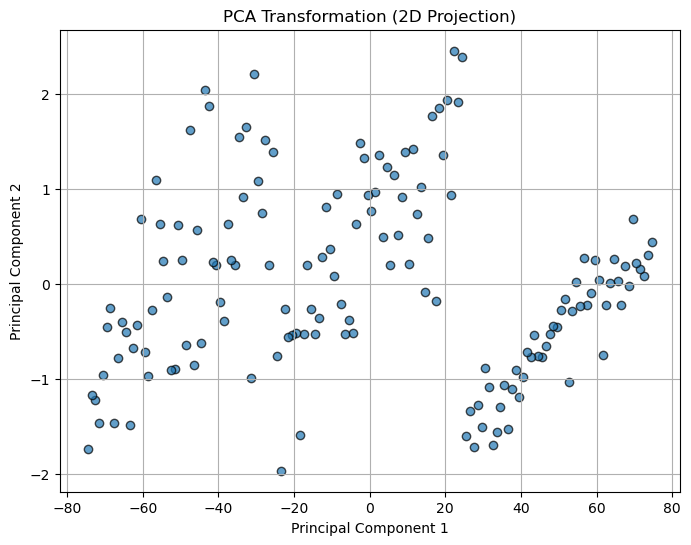

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")

# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=[np.number])

# Step 1: Center the Data
mean_vector = np.mean(df_numeric, axis=0)
centered_data = df_numeric - mean_vector

# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(centered_data.T)  # Transpose needed for correct computation

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Select Principal Components (Sort by largest eigenvalues)
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort descending
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose top k components (let’s take 2 for visualization)
k = 2
principal_components = sorted_eigenvectors[:, :k]

# Step 5: Transform the Data
transformed_data = np.dot(centered_data, principal_components)

# Convert to DataFrame for easy visualization
pca_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(k)])

# Display results
print("Covariance Matrix:\n", cov_matrix)
print("\nEigenvalues:\n", sorted_eigenvalues)
print("\nEigenvectors:\n", sorted_eigenvectors)

# Scatter plot of the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7, edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformation (2D Projection)")
plt.grid()
plt.show()


### PCA Analysis Step By Step

In [110]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [112]:
df = pd.read_csv("Iris.csv")
# Display first few rows of the dataset
print("Dataset Head:\n", df.head())

Dataset Head:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


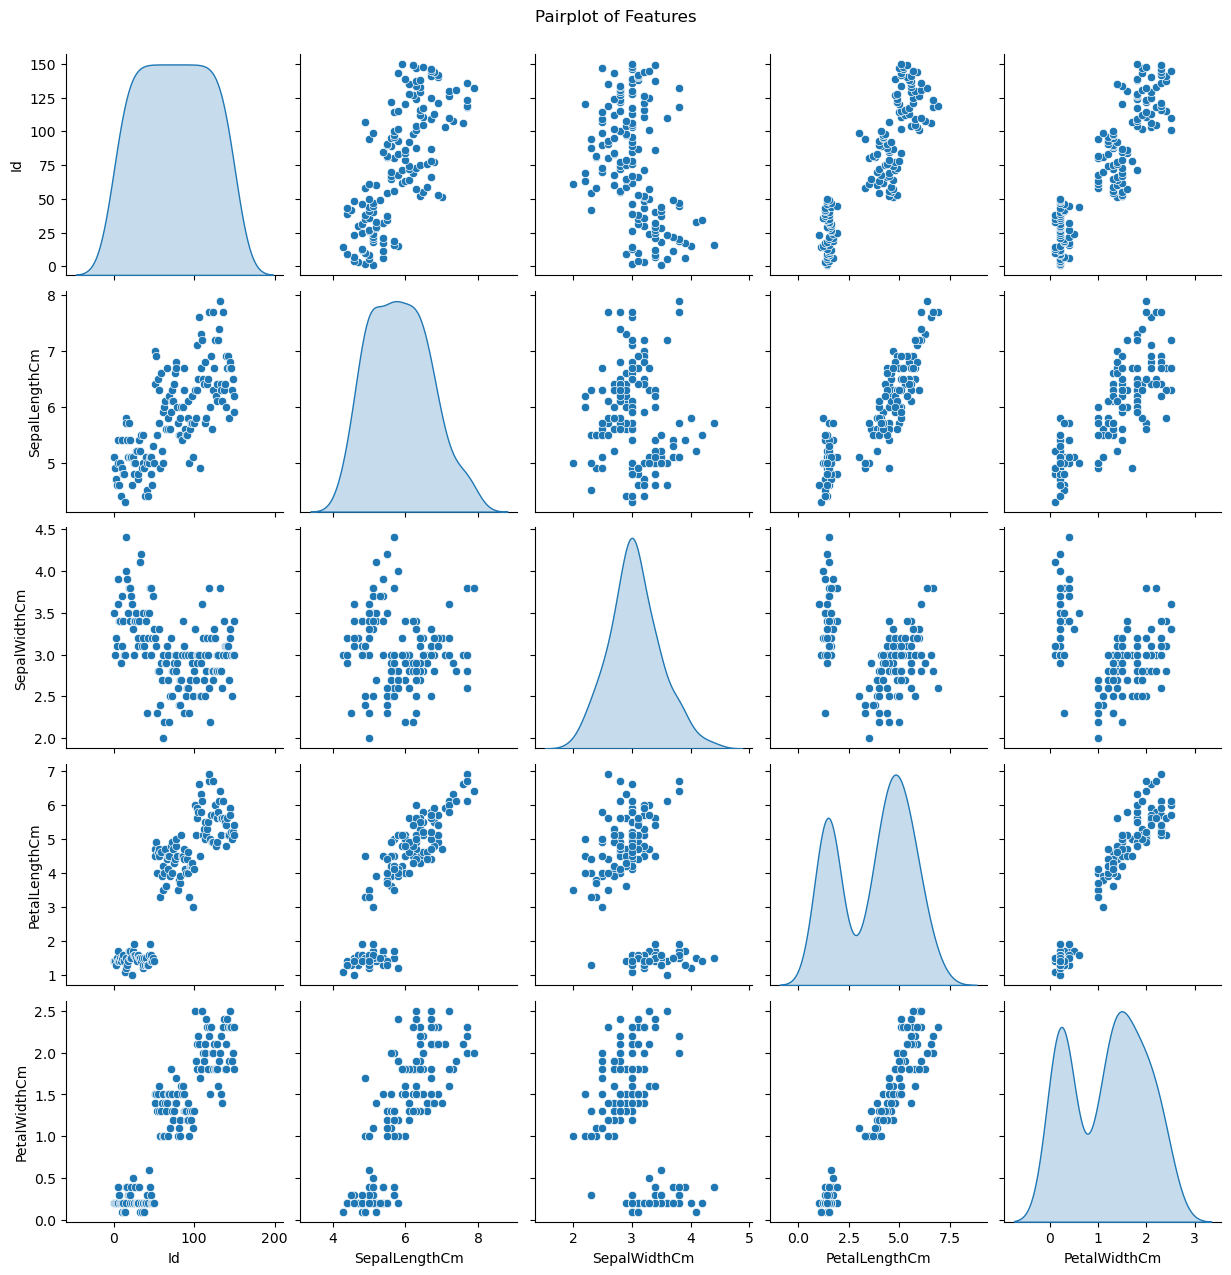

In [122]:
# Step 3: Plot and Compare Each Variable
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [116]:
# Step 4: Split Independent (X) and Dependent (Y) Variables
# Assuming the last column is the dependent variable (e.g., 'Species' in the Iris dataset)
X = df.iloc[:, :-1]  # All columns except the last one
Y = df.iloc[:, -1]   # The last column (target)

In [84]:
# Standardizing the Data (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Step 5: Compute Covariance Matrix
cov_matrix = np.cov(X_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141  0.72148618 -0.40039813  0.8886718   0.90579723]
 [ 0.72148618  1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.40039813 -0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.8886718   0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.90579723  0.82344326 -0.358937    0.96921855  1.00671141]]


In [88]:
# Step 6: Compute Eigenvalues & Eigenvectors (Eigen Pairs)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [13]:
# Step 7: Calculate Cumulative Variance Explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

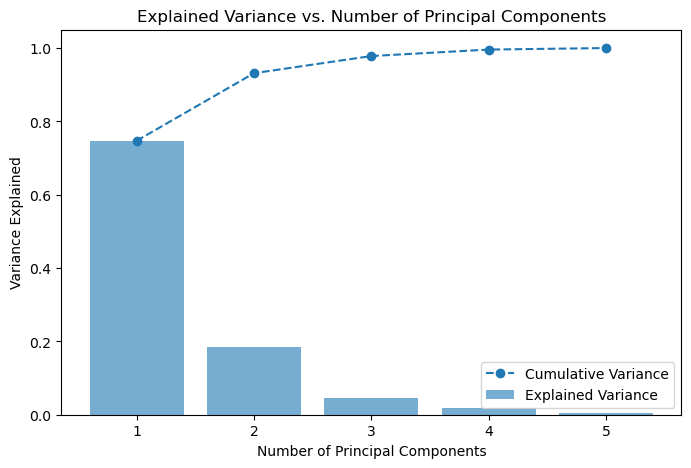

In [90]:
# Step 8: Plot Explained Variance Ratio & Principal Components
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label="Explained Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.legend()
plt.title("Explained Variance vs. Number of Principal Components")
plt.show()

In [92]:
# Step 9: Apply PCA and Transform Data
pca = PCA(n_components=2)  # Choose top 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [94]:
# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = Y  # Add the target column back

In [96]:
pca_df

,PC1,PC2,Target
0,-2.816339,0.506051,Iris-setosa
1,-2.645527,-0.651799,Iris-setosa
2,-2.879481,-0.321036,Iris-setosa
3,-2.810934,-0.577363,Iris-setosa
4,-2.879884,0.670468,Iris-setosa
...,...,...,...
145,2.424421,0.377119,Iris-virginica
146,2.164220,-0.915696,Iris-virginica
147,2.139796,0.254272,Iris-virginica
148,2.029480,0.998725,Iris-virginica


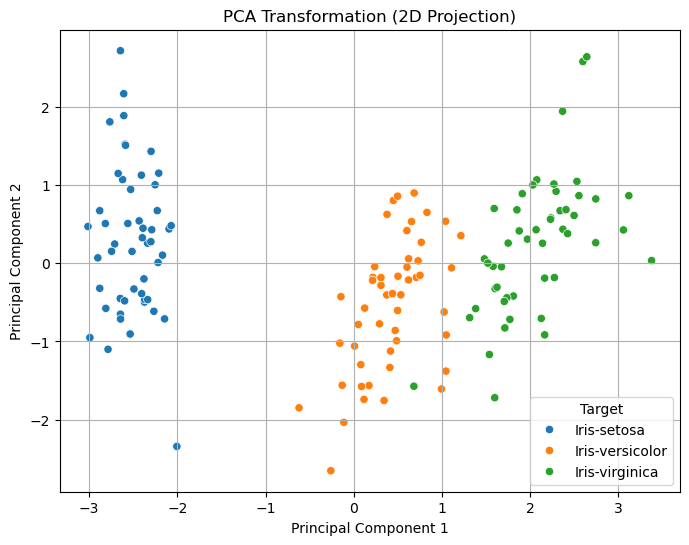

In [106]:
# Scatter plot of PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df)
plt.title("PCA Transformation (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [108]:
# Print PCA Components and Variance Explained
print("\nPCA Components:\n", pca.components_)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)


PCA Components:
 [[ 0.48136016  0.44844975 -0.23195044  0.51079205  0.5024696 ]
 [-0.02275157  0.38285827  0.92007839  0.03074857  0.07356757]]

Explained Variance Ratio:
 [0.7470533  0.18435257]


### SVD of any given matrix

In [20]:
import numpy as np

# Given matrix A
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute SVD
U, S, VT = np.linalg.svd(A)


In [21]:

print("U matrix:\n", U)
print("\nSingular Values (Diagonal of Sigma):\n", S)
print("\nV Transposed matrix:\n", VT)


U matrix:
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

Singular Values (Diagonal of Sigma):
 [9.52551809 0.51430058]

V Transposed matrix:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [22]:
# Convert S into a full-sized diagonal matrix (matching A's dimensions)
Sigma = np.zeros((A.shape[0], A.shape[1]))  # Create zero matrix with A's shape
np.fill_diagonal(Sigma, S)  # Place singular values along the diagonal

# Reconstruct A using U, Sigma, and VT
A_reconstructed = U @ Sigma @ VT

print("Original A:\n", A)
print("\nReconstructed A:\n", A_reconstructed)

Original A:
 [[1 2]
 [3 4]
 [5 6]]

Reconstructed A:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


TypeError: array() takes from 1 to 2 positional arguments but 3 were given